# Question 1: 

In [1]:
import pandas as pd
URL = r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(URL, sep='|')
print(users.groupby('occupation').age.mean())

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


In [2]:
records_by_gender = users.pivot_table(index='occupation', columns='gender', aggfunc='size', fill_value=0)
sums= records_by_gender[['F', 'M']].sum(axis=1)
records_by_gender['Male Ratio'] = round(100 * records_by_gender['M'] / sums , 1)
records_by_gender['Male Ratio'].sort_values(ascending=False)

occupation
doctor           100.0
engineer          97.0
technician        96.3
retired           92.9
programmer        90.9
executive         90.6
scientist         90.3
entertainment     88.9
lawyer            83.3
salesman          75.0
educator          72.6
student           69.4
other             65.7
marketing         61.5
writer            57.8
none              55.6
administrator     54.4
artist            53.6
librarian         43.1
healthcare        31.2
homemaker         14.3
Name: Male Ratio, dtype: float64

In [3]:
users.groupby('occupation').age.agg(['min','max'])

,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [4]:
users.groupby(['occupation', 'gender']).agg({'age':['mean']})

age
                           mean
occupation    gender           
administrator F       40.638889
              M       37.162791
artist        F       30.307692
              M       32.333333
doctor        M       43.571429
educator      F       39.115385
              M       43.101449
engineer      F       29.500000
              M       36.600000
entertainment F       31.000000
              M       29.000000
executive     F       44.000000
              M       38.172414
healthcare    F       39.818182
              M       45.400000
homemaker     F       34.166667
              M       23.000000
lawyer        F       39.500000
              M       36.200000
librarian     F       40.000000
              M       40.000000
marketing     F       37.200000
              M       37.875000
none          F       36.500000
              M       18.600000
other         F       35.472222
              M       34.028986
programmer    F       32.166667
              M       33.216667
retired       F       70.000000
              M       62.538462
salesman      F       27.000000
              M       38.555556
scientist     F       28.333333
              M       36.321429
student       F       20.750000
              M       22.669118
technician    F       38.000000
              M       32.961538
writer        F       37.631579
              M       35.346154

In [5]:
usercount=users.groupby(['occupation','gender'])['gender'].count()
totalCount=users.groupby(['occupation'])['gender'].count()
gender_percent=((usercount/totalCount)*100)
gender_percent

occupation     gender
administrator  F          45.569620
               M          54.430380
artist         F          46.428571
               M          53.571429
doctor         M         100.000000
educator       F          27.368421
               M          72.631579
engineer       F           2.985075
               M          97.014925
entertainment  F          11.111111
               M          88.888889
executive      F           9.375000
               M          90.625000
healthcare     F          68.750000
               M          31.250000
homemaker      F          85.714286
               M          14.285714
lawyer         F          16.666667
               M          83.333333
librarian      F          56.862745
               M          43.137255
marketing      F          38.461538
               M          61.538462
none           F          44.444444
               M          55.555556
other          F          34.285714
               M          65.714286
progra

# Question 2: 

In [6]:
import pandas as pd
euro12=pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12['Goals']

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64

In [7]:
euro12.shape[0]

16

In [8]:
euro12.shape[1]

35

In [9]:
Discipline=euro12[{'Team','Yellow Cards','Red Cards'}]
Discipline

,Team,Red Cards,Yellow Cards
0,Croatia,0,9
1,Czech Republic,0,7
2,Denmark,0,4
3,England,0,5
4,France,0,6
5,Germany,0,4
6,Greece,1,9
7,Italy,0,16
8,Netherlands,0,5
9,Poland,1,7


In [10]:
Discipline.sort_values(by=['Red Cards','Yellow Cards'])

,Team,Red Cards,Yellow Cards
2,Denmark,0,4
5,Germany,0,4
3,England,0,5
8,Netherlands,0,5
15,Ukraine,0,5
4,France,0,6
12,Russia,0,6
1,Czech Republic,0,7
14,Sweden,0,7
0,Croatia,0,9


In [11]:
Discipline.groupby(['Team']).agg({'Yellow Cards':['mean']})

,Yellow Cards
,mean
Team,
Croatia,9.0
Czech Republic,7.0
Denmark,4.0
England,5.0
France,6.0
Germany,4.0
Greece,9.0
Italy,16.0


In [12]:
euro12[euro12['Goals'] > 6]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [13]:
euro12[euro12['Team'].str[0] == 'G']

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [14]:
euro12.iloc[:, 0:7]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [15]:
euro12[euro12.columns[:-3]]

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [16]:
indexed_data = euro12.set_index('Team')
indexed_data.loc[['England','Italy','Russia'],['Shooting Accuracy']]

,Shooting Accuracy
Team,
England,50.0%
Italy,43.0%
Russia,22.5%


# Question 3: 

In [17]:
import pandas as pd
import numpy as np
first = np.random.randint(1,4,size=100)
second= np.random.randint(1,3,size=100)
third = np.random.randint(10000,30000,size=100)

In [18]:
df = pd.DataFrame(data=dict(first=first,  second=second,  third=third))
df.head()

,first,second,third
0,1,1,18880
1,3,1,21598
2,3,1,23425
3,1,2,16082
4,3,1,14491


In [19]:
df = pd.DataFrame(data=dict(bedrs=first,  bathrs=second,  price_sqr_meter=third))
df.head()

,bedrs,bathrs,price_sqr_meter
0,1,1,18880
1,3,1,21598
2,3,1,23425
3,1,2,16082
4,3,1,14491


In [20]:
bigcolumn =(df['bedrs'].append(df['bathrs']).append(df['price_sqr_meter']))
bigcolumn

0         1
1         3
2         3
3         1
4         3
      ...  
95    23981
96    22643
97    26435
98    11730
99    26809
Length: 300, dtype: int32

#### It is going only until index 99. Is it true?

#### Yes,index goes until 99 only.

In [21]:
bigcolumn = bigcolumn.reset_index(drop=True)
bigcolumn

0          1
1          3
2          3
3          1
4          3
       ...  
295    23981
296    22643
297    26435
298    11730
299    26809
Length: 300, dtype: int32

# Question 4: 

In [23]:
import pandas as pd
import datetime
data = pd.read_csv("C:/Users/soura/OneDrive/Desktop/Wind.txt")
data = pd.read_csv("C:/Users/soura/OneDrive/Desktop/Wind.txt", sep = "\s+", parse_dates = {'Date':[0,1,2]})
data.head()



,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,2061-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,2061-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,2061-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,2061-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,2061-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [24]:
import datetime as dt

def correct_year(x):
    if x.year > 2021:
        year = x.year - 100
    else:
        year = x.year
    return dt.date(year,x.month,x.day)

data['Date']=data['Date'].apply(lambda x: correct_year(x))
data

,Date,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,1961-01-01,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,1961-01-02,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,1961-01-03,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,1961-01-04,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,1961-01-05,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,17.58,16.96,17.62,8.08,13.21,11.67,14.46,15.59,14.04,14.00,17.21,40.08
6570,1978-12-28,13.21,5.46,13.46,5.00,8.12,9.42,14.33,16.25,15.25,18.05,21.79,41.46
6571,1978-12-29,14.00,10.29,14.42,8.71,9.71,10.54,19.17,12.46,14.50,16.42,18.88,29.58
6572,1978-12-30,18.50,14.04,21.29,9.13,12.75,9.71,18.08,12.87,12.46,12.12,14.67,28.79


In [25]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data = data.set_index('Date')

In [26]:
print(data.isnull().sum())
(data.notnull().sum())
print(data.notnull().sum().sum())
print(data.mean().mean())

RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64
78857
10.227982360836924


In [27]:
loc_stats = data.agg(["count","min","max","mean","std"])
loc_stats

,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
count,6568.000000,6571.000000,6572.000000,6569.000000,6572.000000,6574.000000,6571.000000,6572.000000,6571.000000,6573.000000,6574.000000,6570.000000
min,0.670000,0.210000,1.500000,0.000000,0.130000,0.000000,0.000000,0.000000,0.000000,0.040000,0.130000,0.670000
max,35.800000,33.370000,33.840000,28.460000,37.540000,26.160000,30.370000,31.080000,25.880000,28.210000,42.380000,42.540000
mean,12.362987,10.644314,11.660526,6.306468,10.455834,7.092254,9.797343,8.495053,8.493590,8.707332,13.121007,15.599079
std,5.618413,5.267356,5.008450,3.605811,4.936125,3.968683,4.977555,4.499449,4.166872,4.503954,5.835037,6.699794


In [28]:
day_stats=pd.DataFrame()
day_stats['min']=data.min(axis=1)
day_stats['max']=data.max(axis=1)
day_stats['mean']=data.mean(axis=1)
day_stats['std']=data.std(axis=1)
day_stats.head()
avg_windspeed=data[data.index.month==1]
avg_windspeed.mean()

RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64

In [29]:
yearly_freq = data.resample(rule = "Y")
print(yearly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31  11.835628  10.468197  11.409754  6.477678  10.760765  6.067322   
1969-12-31  11.166356   9.723699  10.902000  5.767973   9.873918  6.189973   
1970-12-31  12.600329  10.726932  11.730247  6.217178  10.567370  7.609452   
1971-12-31  11.273123   9.095178  11.088329  5.241507   9.440329

In [30]:
yearly_freq = data.resample(rule = "M")
print(yearly_freq.mean())

                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   
...               ...        ...        ...       ...        ...        ...   
1978-08-31   9.645161   8.259355   9.032258  4.502903   7.368065   5.935161   
1978-09-30  10.913667  10.895000  10.635000  5.725000  10.372000   9.278333   
1978-10-31   9.897742   8.670968   9.295806  4.721290   8.525161   6.774194   
1978-11-30  16.151667  14.802667  13.508000  7.317333  11.475000   8.743000   
1978-12-31  16.175484  13.748065  15.635161  7.09483

In [31]:
weekly_freq = data.resample(rule = "W")
print(weekly_freq.mean())


                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   
...               ...        ...        ...        ...        ...        ...   
1978-12-03  14.934286  11.232857  13.941429   5.565714  10.215714   8.618571   
1978-12-10  20.740000  19.190000  17.034286   9.777143  15.287143  12.774286   
1978-12-17  16.758571  14.692857  14.987143   6.917143  11.397143   7.272857   
1978-12-24  11.155714   8.008571  13.172857   4.004286   7.825714   6.290000   
1978-12-31  14.951429  11.801429  16.035

In [32]:
weekly = data.resample(rule = "W").agg(['min','max','mean','std'])
print(weekly.head())

              RPT                                VAL                    \
              min    max       mean       std    min    max       mean   
Date                                                                     
1961-01-01  15.04  15.04  15.040000       NaN  14.96  14.96  14.960000   
1961-01-08  10.58  18.50  13.541429  2.631321   6.63  16.88  11.486667   
1961-01-15   9.04  19.75  12.468571  3.555392   3.54  12.08   8.967143   
1961-01-22   4.92  19.83  13.204286  5.337402   3.42  14.37   9.862857   
1961-01-29  13.62  25.04  19.880000  4.619061   9.96  23.91  16.141429   

                        ROS         ...        CLO              BEL         \
                 std    min    max  ...       mean       std    min    max   
Date                                ...                                      
1961-01-01       NaN  13.17  13.17  ...  12.580000       NaN  18.50  18.50   
1961-01-08  3.949525   7.62  12.33  ...   8.497143  1.704941   5.46  17.54   
1961-01-15  3.148

# Question 5: 

In [33]:
import pandas as pd
import datetime
chipotle = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep="\t")
print(chipotle.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

In [34]:
print(chipotle.count())
print(chipotle.shape[1])
print(chipotle.columns)
print(chipotle.index)

order_id              4622
quantity              4622
item_name             4622
choice_description    3376
item_price            4622
dtype: int64
5
Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
RangeIndex(start=0, stop=4622, step=1)


In [35]:
chipotle.groupby(['item_name']).sum().sort_values(by=['quantity'],ascending=False).head(1)
chipotle.groupby(['item_name']).sum().sort_values(by=['quantity'],ascending=False).head(1)
chipotle.groupby(['choice_description']).sum().sort_values(by=['quantity'],ascending=False).head(1)

,order_id,quantity
choice_description,,
[Diet Coke],123455,159


In [36]:
chipotle['quantity'].sum()

4972

In [37]:
print(chipotle.dtypes)
y = lambda x: float(x[1:-1])
chipotle.item_price = chipotle.item_price.apply(y)
chipotle.dtypes


order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object


order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object

In [38]:
orders = chipotle.order_id.value_counts().count()
print(orders)

1834


In [39]:
chipotle['revenue'] = chipotle['quantity'] * chipotle['item_price']
chipotle.groupby(['order_id']).sum().mean()['revenue']

21.394231188658654

In [40]:
chipotle.item_name.value_counts().count()

50

# Question 6: 

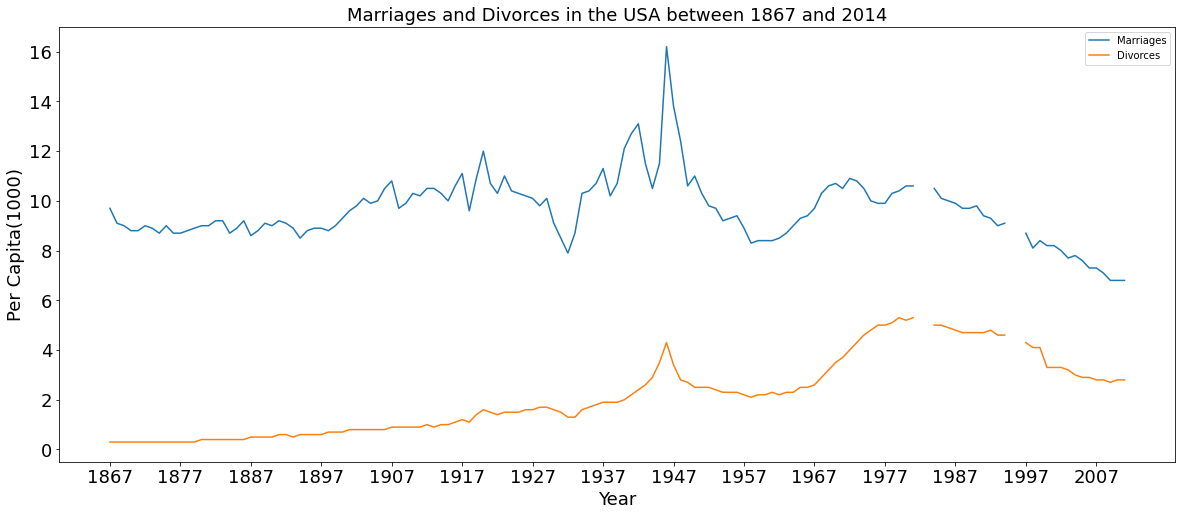

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("C:/Users/soura/Downloads/Data Programming BDAT1004/us-marriages-divorces-1867-2014.csv")
plt.figure(figsize=(20,8))
plt.plot(df.Year,df.Marriages_per_1000,label="Marriages")
plt.plot(df.Year,df.Divorces_per_1000,label="Divorces")
plt.title('Marriages and Divorces in the USA between 1867 and 2014',fontsize=18)
plt.xlabel('Year',fontsize=18)
plt.ylabel('Per Capita(1000)',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.xticks(df.Year[::10])
plt.show()

# Question 7: 

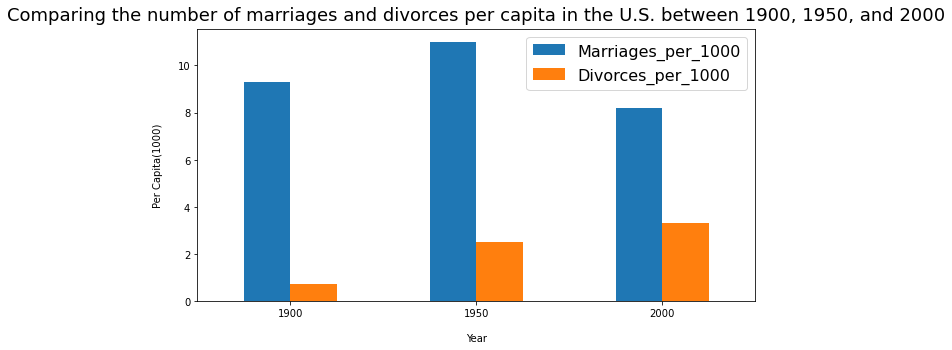

In [43]:
df = df[(df.Year == 1900) | (df.Year == 1950) |(df.Year == 2000)]
df.set_index('Year')[['Marriages_per_1000', 'Divorces_per_1000']].plot(kind='bar', figsize=(10, 5))
plt.xticks(rotation=360)
plt.title("Comparing the number of marriages and divorces per capita in the U.S. between 1900, 1950, and 2000", fontsize=18, y=1.01)
plt.xlabel("Year", labelpad=15)
plt.ylabel("Per Capita(1000)", labelpad=15)
plt.legend(["Marriages_per_1000", "Divorces_per_1000"], fontsize=16)

# Question 8: 

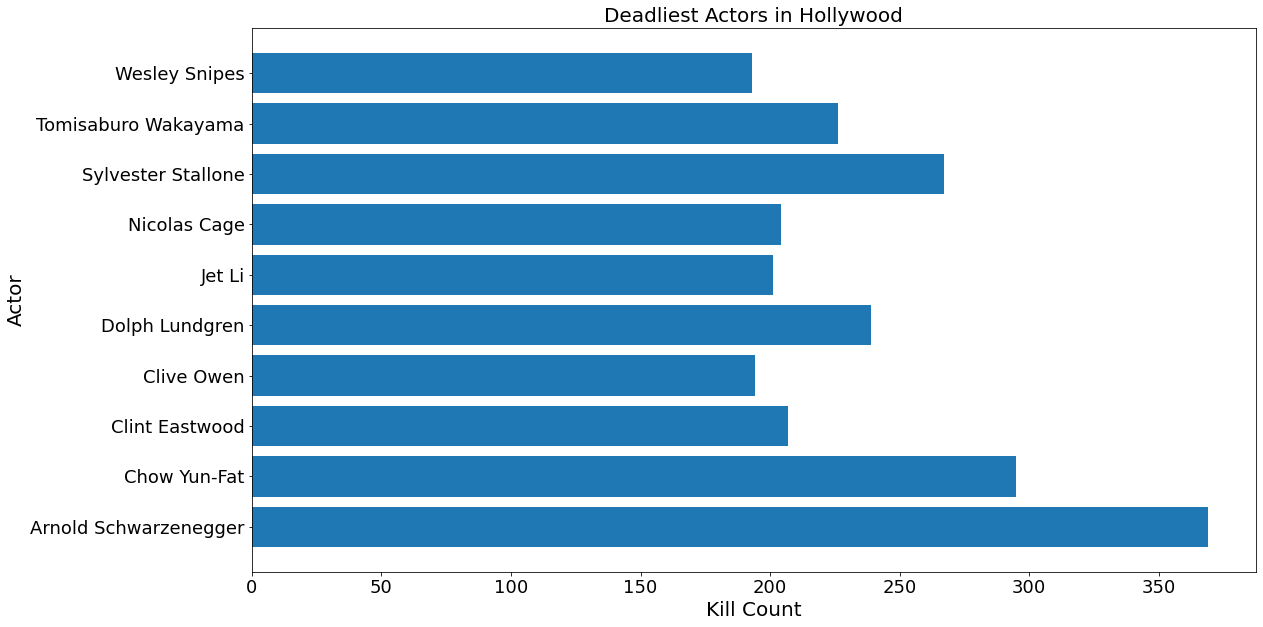

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

hollywood = pd.read_csv("C:/Users/soura/Downloads/Data Programming BDAT1004/actor_kill_counts.csv")
hollywood

plt.figure(figsize=(18,10))
plt.barh(hollywood.Actor,hollywood.Count,align='center')
hollywood = hollywood.sort_values('Count',ascending = True)
plt.title('Deadliest Actors in Hollywood',fontsize=20)
plt.xlabel('Kill Count',fontsize=20)
plt.ylabel('Actor',fontsize=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

# Question 9: 

In [46]:
import pandas as pd
roman_emporer = pd.read_csv("C:/Users/soura/Downloads/Data Programming BDAT1004/roman-emperor-reigns.csv")
roman_emporer.head()
from plotly.offline import iplot

pie1 = roman_emporer.Cause_of_Death
labels = roman_emporer.Cause_of_Death

fig = {  "data": [   {
      "labels": labels,
      "domain": {"x": [.4, .10]},
      "name": "",
      "hoverinfo":"label+percent+name",
      "hole": 0,
      "type": "pie"
    },],
    
    
  "layout": {
        "title":"Causes of Death of all Roman Emporer",
         
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
                "text":"",
                "x": 0.20,
                "y": 1
            },]}}
iplot(fig)


# Question 10: 

<AxesSubplot:xlabel='Total Arcade Revenue (billions)', ylabel='Computer Science Doctorates Awarded (US)'>

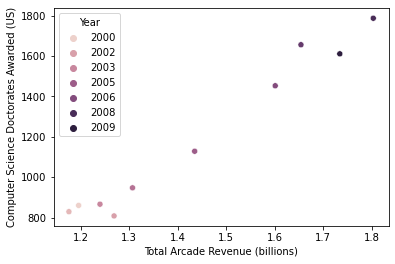

In [47]:
import pandas as pd
import seaborn as sns
total_revenue = pd.read_csv("C:/Users/soura/Downloads/Data Programming BDAT1004/arcade-revenue-vs-cs-doctorates.csv")
sns.scatterplot(x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year', 
                data=total_revenue)